## Handling outliers with standard deviation and median values

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv('hepatitis.data', header=None)
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [51]:
df.columns = ["class", "age", "sex", "steroid", "antivirals","fatigue", "malaise", 
                 "anorexia", "liver_big","liver_firm", "spleen_palpable", "spiders", "ascites", 
                "varices", "bilirubin", "alk_phosphate", "sgot", 
               "albumin","protime", "histology"]
df.tail()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

## Find Duplicates

In [53]:
df.duplicated().sum()

0

In [54]:
df.shape

(155, 20)

## Data Validation and Data Type Conversion

In [55]:
df= df.replace('?', np.NaN)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        145 non-null    object
 9   liver_firm       144 non-null    object
 10  spleen_palpable  150 non-null    object
 11  spiders          150 non-null    object
 12  ascites          150 non-null    object
 13  varices          150 non-null    object
 14  bilirubin        149 non-null    object
 15  alk_phosphate    126 non-null    object
 16  sgot             151 non-null    object
 17  albumin          139 non-null    ob

In [57]:
df['class'] = df['class'].astype('str')
df.sex = df.sex.astype('str')
df.antivirals = df.antivirals.astype('str')
df.bilirubin = df.bilirubin.astype('float')
df.albumin = df.albumin.astype('float')
df.protime = df.protime.astype('float')
df.alk_phosphate = df.alk_phosphate.astype('float')
df.sgot = df.sgot.astype('float')
df.histology = df.histology.astype('str')

In [58]:
df.shape

(155, 20)

## Outliers

In [59]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


### Age

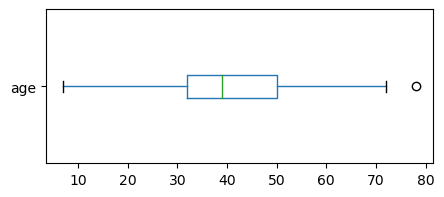

In [60]:
df.boxplot(column='age', fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [61]:
UB = df['age'].mean() + 3 * df['age'].std() 
LB = df['age'].mean() - 3 * df['age'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 78.89763504931959
lower bound: 3.502364950680416


In [62]:
df[(df['age'] < LB) | (df['age'] > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology


#### There is no outliers in age column detected by standard deviation method.

### bilirubin

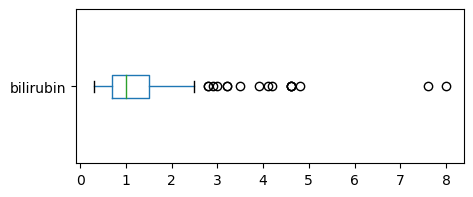

In [63]:
df.boxplot(column='bilirubin', fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [64]:
UB = df['bilirubin'].mean() + 3 * df['bilirubin'].std() 
LB = df['bilirubin'].mean() - 3 * df['bilirubin'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 5.0639638778080585
lower bound: -2.20893032076108


In [65]:
df[(df['bilirubin'] < LB) | (df['bilirubin'] > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
131,1,31,1,1,2,1,1,1,2,2,1,2,2,2,8.0,NaN,101.0,2.2,NaN,2
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,NaN,242.0,3.3,50.0,2


In [66]:
2/len(df)*100

1.2903225806451613

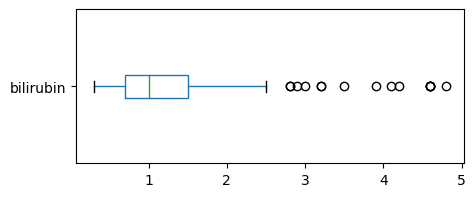

In [67]:
df.bilirubin[(df.bilirubin < LB) | (df.bilirubin > UB)] = np.median(df.bilirubin)
df.boxplot(column='bilirubin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### alk_phosphate

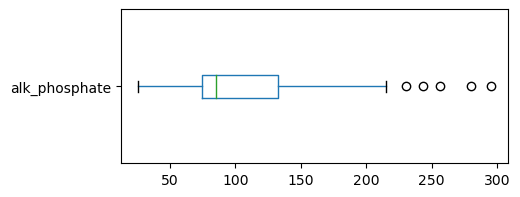

In [68]:
df.boxplot(column='alk_phosphate',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [69]:
UB = df['alk_phosphate'].mean() + 3 * df['alk_phosphate'].std() 
LB = df['alk_phosphate'].mean() - 3 * df['alk_phosphate'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 259.849723158086
lower bound: -49.19892950729239


In [70]:
df[(df.alk_phosphate < LB) | (df.alk_phosphate > UB)] 

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
30,1,39,1,1,1,1,1,2,2,1,2,2,2,2,2.3,280.0,98.0,3.8,40.0,1
140,2,36,1,1,2,1,1,1,1,1,2,1,2,1,1.7,295.0,60.0,2.7,NaN,2


In [71]:
2/len(df)*100

1.2903225806451613

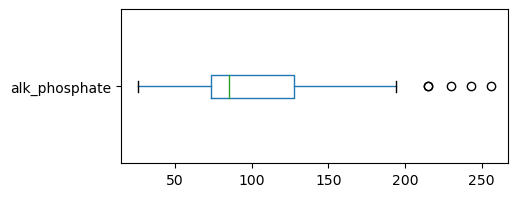

In [72]:
df.alk_phosphate[(df.alk_phosphate < LB) | (df.alk_phosphate > UB)] = np.median(df.alk_phosphate)
df.boxplot(column='alk_phosphate',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### sgot

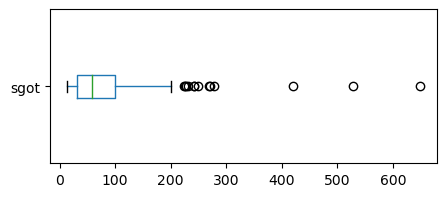

In [73]:
df.boxplot(column='sgot',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [74]:
UB = df['sgot'].mean() + 3 * df['sgot'].std() 
LB = df['sgot'].mean() - 3 * df['sgot'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 354.8467089506059
lower bound: -183.0586294804072


In [75]:
df[(df.sgot < LB) | (df.sgot > UB)] 

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
47,2,28,2,2,2,1,1,2,2,1,2,2,2,2,1.8,191.0,420.0,3.3,46.0,1
107,2,45,1,1,2,1,1,1,2,2,2,2,2,2,2.3,NaN,648.0,NaN,NaN,2
147,1,70,1,1,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,2


In [76]:
3/len(df)*100

1.935483870967742

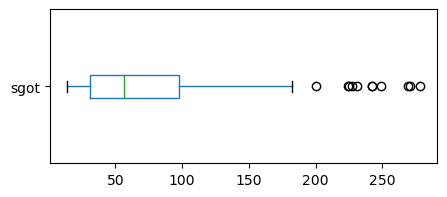

In [77]:
df.sgot[(df.sgot < LB) | (df.sgot > UB)] = np.median(df.sgot)
df.boxplot(column='sgot',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### albumin

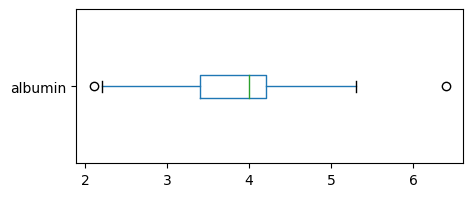

In [78]:
df.boxplot(column='albumin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [79]:
UB = df['albumin'].mean() + 3 * df['albumin'].std() 
LB = df['albumin'].mean() - 3 * df['albumin'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 5.771835434898999
lower bound: 1.8626969392017194


In [80]:
df[(df.albumin < LB) | (df.albumin > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
105,2,25,1,2,2,2,2,2,2,2,2,2,2,2,0.6,NaN,34.0,6.4,NaN,2


In [81]:
1/len(df)*100

0.6451612903225806

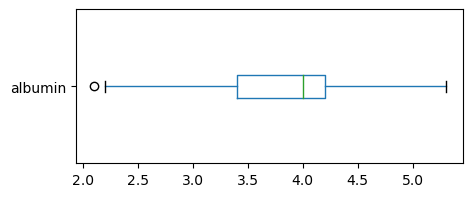

In [82]:
df.albumin[(df.albumin < LB) | (df.albumin > UB)] = np.median(df.albumin)
df.boxplot(column='albumin',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### protime

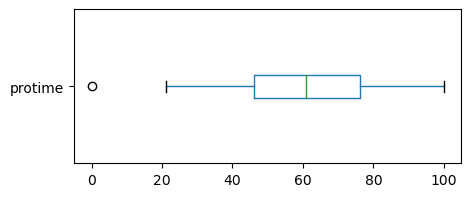

In [83]:
df.boxplot(column='protime',fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [84]:
UB = df['protime'].mean() + 3 * df['protime'].std() 
LB = df['protime'].mean() - 3 * df['protime'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 130.47800396170706
lower bound: -6.773458507161614


In [85]:
df[(df.protime < LB) | (df.protime > UB)]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology


#### There is no outliers in protime column detected by standard deviation method.

In [86]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,147.000000,124.000000,148.000000,138.000000,88.000000
mean,41.200000,1.340816,102.387097,76.851351,3.798551,61.852273
std,12.565878,0.961787,46.335417,62.294163,0.615254,22.875244
min,7.000000,0.300000,26.000000,14.000000,2.100000,0.000000
25%,32.000000,0.700000,73.500000,31.000000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,56.500000,4.000000,61.000000
75%,50.000000,1.500000,127.750000,98.000000,4.200000,76.250000
max,78.000000,4.800000,256.000000,278.000000,5.300000,100.000000


In [87]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,200.0,4.0,NaN,1


In [88]:
df.alk_phosphate = df.alk_phosphate.round().astype(float)
df.sgot = df.sgot.round().astype(float)
df.protime = np.round(df.protime)
df.bilirubin = np.round(df.bilirubin,2)
df.albumin = np.round(df.albumin,2)

df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,NaN,200.0,4.0,NaN,1


In [89]:
# saving the dataframe
df.to_csv('hepatitis4_outlier_stdmean_median.csv', index=False)